<a href="https://colab.research.google.com/github/manufabregas/Dataset-Asistencia-a-turnos-m-dicos/blob/main/Pr%C3%A1ctico_1_An%C3%A1lisis_y_visualizaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
### **Descripción del problema:**


En una clínica hay tareas que son rutinarias y automatizables y otras que no. La gente que va a una clínica llega con distintos problemas a resolver, con distintos grados de urgencia.
En mi equipo de la empresa Kunan pensamos una solución para las tareas de urgencia baja y que tienen gran potencial de automatización, con el espíritu de que eso libere la carga a personas de tener trabajos repetitivos, para que estas personas se puedan enfocar en los casos más urgentes o que necesiten expertise humano.

Un trabajo repetitivo que se presenta en un entorno clínica es el de atender a pedidos por:
*   **sacar un turno** para un médico de una especialidad, en una sede, en un horario.
*   **consultar los turnos** vigentes que un paciente tiene.
*   **cancelar un turno vigente**

Nosotrxs ofrecemos como producto un chatbot, o asistente conversacional, que usa Machine Learning para poder mantener una conversación y realizar acciones. Además de ocuparse de esas tres tareas principales, se le agregan
*  hablar con un humano (lo que nosotres llamamos handoff) a través del mismo canal de comunicación.
*  responder preguntas frecuentes (¿dónde queda la clínica? ¿qué horarios de atención tienen? ¿qué médicos hay?)
*  poner en contacto con un agente humano ante una emergencia
*  brindar un espacio para dejar sugerencias y reclamos
*  brindar videos instructivos sobre las distintas funciones a partir de la solicitud de **ayuda**

La funcionalidad de handoff es muy importante ya que una de las características innatas de los modelos de Machine Learning es que pueden fallar. Un fallo en un bot conversacional se ve como: no entender la intención detrás de una expresión del usuarie, no poder reconocer y extraer correctamente entidades (como lo son nombres de personas, dnis, teléfonos, especialidades médicas, etc), o perder el hilo de una conversación. Para que en estos casos la persona usuaria tenga una forma de suplir la necesidad que la llevó a hablar con el bot, ofrecemos una integración con un sistema de mensajería directo con operadores humanos.

En la mayoría de las clínicas la gente realiza estas acciones enlistadas hablando con un asistente directamente, a travésen términos de interfaces gráficas como la de un sitio web es algo con un poco más de tradición dentro del desarrollo de productos de software, sobre todo en comparación a las interfaces conversacionales. Whatsapp tiene, especialmente en latinomérica, gran adopción por parte de las personas, que están acostumbradas a usarlo como una interfaz conversacional para el acceso a múltiples servicios.

Un asistente conversacional ofrece una interfaz textual conversacional para la toma de acciones. En vez de apretar botones las personas van guiando a un chatbot a través de opciones en formularios.

Este producto tiene ese desafío doble: ser un producto de NLP en español y ser un producto de Datos en la industria.


### **Motivación**
La asistencia a turnos médicos es esencial para la calidad del cuidado del paciente y la eficiencia de los recursos médicos. La no asistencia puede desperdiciar tiempo y recursos, y afectar negativamente la salud de los pacientes.

Con el avance en análisis de datos y técnicas de predicción, es posible anticipar la probabilidad de que un paciente falte a su cita. Predecir estas ausencias permite implementar estrategias como recordatorios personalizados y reprogramación proactiva, beneficiando tanto a pacientes como a proveedores de servicios de salud.

En esta serie de prácticos, desarrollaremos y evaluaremos modelos predictivos utilizando datos históricos de citas médicas. Exploraremos y prepararemos estos datos, construyendo modelos para predecir la asistencia y evaluando su efectividad. Nuestro objetivo es mejorar la gestión de citas médicas, reducir ausencias y contribuir a un sistema de salud más eficiente.

### **Descripción del dataset**
El dataset con el que trabajaremos este práctico consta de 47k filas (47088 para ser específicos) y 21 columnas. Corresponde a datos provenientes de turnos médicos, con el comportamiento final de si la persona asistió o no (attendance). Estos datos fueron extraídos a partir de las conversaciones que tienen las personas con el asistente conversacional, a partir del canal de Whatsapp. El dataset presentado corresponde al periodo desde el 11 de abril de 2023 al 30 de noviembre.

El significado de cada columna es el siguiente:
*  **doc_id**: Es el ID único que tiene cada médicx en cada clínica y sede.
*  **doc_full_name**: Nombre y apellido de cada especialista anonimizado.
*  **msp_name**: Nombre de la especialidad médica.
*  **msp_id**: ID de la especialidad médica único en cada clínica y sede.
*  **hos_id**: Nombre de la clínica anonimizado.
*  **heq_id**: ID de la sede de cada clínica. Hay algunos centros médicos que son monosede y otros multisede.
*  **hin_name**: Nombre de la obra social, particular o servicio de seguro de salud con el cual realiza la consulta médica.
*  **hin_id**: ID del hin_name el cual resulta único en cada clínica y sede.
*  **age_avg**: Estimación del promedio de edad calculado a partir del DNI de lxs pacientes.
*  **dni_asistance_rate**: Tasa de asistencia de cada paciente. Cantidad de turnos que ha asistido cada paciente históricamente/Cantidad de turnos que ha sacado cada paciente históricamente*100.
*  **doc_asistance_rate**: Tasa de asistencia de cada especialista por hospital y sede. Cantidad de pacientes que han asistido históricamente por especialista/Cantidad de pacientes que han sacado turno históricamente por especialista*100.
*  **msp_asistance_rate**: Tasa de asistencia de cada especialidad médica por hospital y sede. Cantidad de pacientes que han asistido históricamente por especialidad/Cantidad de pacientes que han sacado turno históricamente por especialidad*100.
*  **hosheq_asistance_rate**: Tasa de asistencia global de cada hospital y sede. Cantidad de pacientes que han asistido históricamente por hospital y sede/Cantidad de pacientes que han sacado turno históricamente por hospital y sede*100.
*  **app_start_dt**: Fecha del turno médico.
*  **action_A_count**: Cantidad de turnos sacados históricamente por el paciente a través del asistente conversacional.
*  **action_B_count**: Cantidad de turnos cancelados históricamente por el paciente a através del asistente conversacional.
*  **action_C_count**: Cantidad de veces que el paciente consultó su turno (ver citas pendientes).
*  **app_days_gap**: Distancia en días entre la fecha en que la persona realizó la solicitud del turno y la fecha del turno efectivamente.
*  **patient_id**: ID único de cada paciente dentro de cada clínica y sede.
*  **event_id**: ID **único** de cada turno médico global.  
*  **attendance**: Variable que indica 0 si la persona no asistió a su turno programado y 1 si la persona asistió.

#**Cargando el dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import plotly.express as px

%matplotlib inline

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/kunan-sa/mentoria_2024/master/dataset/base_asistencia_anon.csv", encoding='utf8')
df=df.drop(columns=['Unnamed: 0'])
df_orignial = df.copy()

Viendo un par de ejemplos para conocer la base:

In [ ]:
#Revisando la base
df.head(5)

,doc_id,doc_full_name,msp_name,msp_id,hos_id,heq_id,hin_name,hin_id,age_avg,dni_asistance_rate,...,msp_asistance_rate,hosheq_asistance_rate,app_start_dt,action_A_count,action_B_count,action_C_count,app_days_gap,patient_id,event_id,attendance
0,215,Carmen Sánchez,Neurologa,159,Hospital Dragonstone,3,PAMI INSTNACSERVSOCJUBY PENSPAMI,0,77.0,72.727273,...,71.085359,69.875045,2023-06-23 15:40:00.000,11,2,4,39,75571,290588,0
1,1855,Sofía García,CARDIOLOGIA INFANTIL,141,Instituto Harrenhal,12,OSDE,0,7.0,50.000000,...,75.919732,85.898672,2023-07-18 09:00:00.000,1,0,0,48,374820,3590242,0
2,215,Carmen Sánchez,Neurologa,159,Hospital Dragonstone,3,PAMI INSTNACSERVSOCJUBY PENSPAMI,0,60.0,37.500000,...,71.085359,69.875045,2023-10-10 13:40:00.000,10,0,2,33,72497,320006,0
3,3,Arizona Robbins,GINECOLOGIA Y OBSTETRICIA,14,Centro médico Casterly Rock,5,OSDE,0,34.0,50.000000,...,86.914721,84.586035,2023-08-23 18:20:00.000,11,0,0,1,12341,597903,1
4,43,Graham Pritchard,Ginecologa,151,Hospital Dragonstone,3,PAMI INSTNACSERVSOCJUBY PENSPAMI,0,60.0,100.000000,...,71.529776,69.875045,2023-07-27 16:15:00.000,4,0,0,13,86202,305566,1


In [ ]:
# #Revisando tipos de datos en cada columna
df.dtypes

doc_id                     int64
doc_full_name             object
msp_name                  object
msp_id                     int64
hos_id                    object
heq_id                     int64
hin_name                  object
hin_id                     int64
age_avg                  float64
dni_asistance_rate       float64
doc_asistance_rate       float64
msp_asistance_rate       float64
hosheq_asistance_rate    float64
app_start_dt              object
action_A_count             int64
action_B_count             int64
action_C_count             int64
app_days_gap               int64
patient_id                 int64
event_id                   int64
attendance                 int64
dtype: object

In [ ]:
#Panorama rápido del dataset
df.describe(include='all')

,doc_id,doc_full_name,msp_name,msp_id,hos_id,heq_id,hin_name,hin_id,age_avg,dni_asistance_rate,...,msp_asistance_rate,hosheq_asistance_rate,app_start_dt,action_A_count,action_B_count,action_C_count,app_days_gap,patient_id,event_id,attendance
count,47088.000000,47088,47088,47088.000000,47088,47088.000000,47088,47088.000000,47088.000000,47034.000000,...,47086.000000,47088.000000,47088,47088.000000,47088.000000,47088.000000,47088.000000,47088.000000,4.708800e+04,47088.000000
unique,NaN,612,107,NaN,6,NaN,224,NaN,NaN,NaN,...,NaN,NaN,10164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Carmen Sánchez,TRAUMATOLOGIA,NaN,Centro Winterfell,NaN,PAMI INSTNACSERVSOCJUBY PENSPAMI,NaN,NaN,NaN,...,NaN,NaN,2023-07-11 10:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,789,4212,NaN,13751,NaN,7103,NaN,NaN,NaN,...,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,993.035487,NaN,NaN,151.059166,NaN,4.369882,NaN,2828.434782,78.955212,69.136019,...,73.432499,73.737895,NaN,7.616081,1.561374,1.410911,21.103317,272103.011319,2.067244e+06,0.682552
std,761.043398,NaN,NaN,54.922554,NaN,3.905375,NaN,3861.789238,268.812266,35.545740,...,16.100785,15.216013,NaN,7.544790,3.318205,3.897998,18.259299,255599.375664,1.451172e+06,0.465488
min,2.000000,NaN,NaN,6.000000,NaN,1.000000,NaN,0.000000,7.000000,0.000000,...,0.000000,20.803002,NaN,1.000000,0.000000,0.000000,0.000000,6.000000,2.728420e+05,0.000000
25%,130.000000,NaN,NaN,143.000000,NaN,2.000000,NaN,0.000000,30.000000,50.000000,...,70.071648,69.875045,NaN,3.000000,0.000000,0.000000,6.000000,55443.000000,3.317805e+05,0.000000
50%,1016.000000,NaN,NaN,150.000000,NaN,3.000000,NaN,0.000000,44.000000,80.000000,...,78.256071,78.480204,NaN,5.000000,0.000000,0.000000,15.000000,137476.500000,2.951014e+06,1.000000
75%,1583.000000,NaN,NaN,167.000000,NaN,4.000000,NaN,8068.000000,60.000000,100.000000,...,83.118866,81.196569,NaN,10.000000,2.000000,1.000000,34.000000,481387.000000,3.099168e+06,1.000000


### Conociendo los turnos por hospital

In [ ]:
#Nombres de hospitales
df.hos_id.unique()

array(['Hospital Dragonstone', 'Instituto Harrenhal',
       'Centro médico Casterly Rock', 'Centro Winterfell',
       'Consultorios Poniente', 'Dorne'], dtype=object)

In [ ]:
#Turnos médicos en Dorne
df[df['hos_id']=='Dorne'].head(3)

,doc_id,doc_full_name,msp_name,msp_id,hos_id,heq_id,hin_name,hin_id,age_avg,dni_asistance_rate,...,msp_asistance_rate,hosheq_asistance_rate,app_start_dt,action_A_count,action_B_count,action_C_count,app_days_gap,patient_id,event_id,attendance
92,1817,Marcus Belby,GASTROENTEROLOGIA,196,Dorne,3,GALENO,0,30.0,50.0,...,73.595506,77.426536,2023-08-03 19:50:00.000,8,2,5,48,621323,2944247,1
94,1656,Teddy Altman,TRAUMATOLOGIA INFANTIL,252,Dorne,3,PARTICULAR,0,7.0,100.0,...,89.198606,77.426536,2023-07-11 17:30:00.000,3,0,0,8,694337,2959496,1
95,1712,Jaqen H'ghar,CARDIOLOGIA PEDIATRICA,231,Dorne,3,OSPE,0,7.0,100.0,...,77.000000,77.426536,2023-07-26 16:10:00.000,1,0,0,22,751765,2960684,1


In [ ]:
#Cantidad de sedes de Dorne
df[df['hos_id']=='Dorne'].heq_id.unique()

array([3])

# Ejercicios propuestos

# **Ejercicio 1:** Descripción y visualización del dataset
Describa el dataset con sus propias palabras. ¿Cuáles son los tipos de datos que hay en el dataset? ¿Hay columnas derivadas de otras? ¿Encuentra dificultades a priori para entender alguna de las columnas del dataset? ¿Existen valores nulos o que no correspondan dentro de cada feature?
¿Cuántos y cuáles son los hospitales que se encuentran en el dataset?¿Cuántas sedes? ¿Están los mismos hospitales a lo largo del tiempo? ¿Todos los hospitales atienden las mismas especialidades?
Argumente sus respuestas con ejemplos concretos y gráficos.

In [ ]:
#Analizaremos los tipo de datos de las columnas:
df.dtypes

doc_id                     int64
doc_full_name             object
msp_name                  object
msp_id                     int64
hos_id                    object
heq_id                     int64
hin_name                  object
hin_id                     int64
age_avg                  float64
dni_asistance_rate       float64
doc_asistance_rate       float64
msp_asistance_rate       float64
hosheq_asistance_rate    float64
app_start_dt              object
action_A_count             int64
action_B_count             int64
action_C_count             int64
app_days_gap               int64
patient_id                 int64
event_id                   int64
attendance                 int64
dtype: object

In [ ]:
#Analizaremos los valores faltantes
df.isnull().sum()

doc_id                    0
doc_full_name             0
msp_name                  0
msp_id                    0
hos_id                    0
heq_id                    0
hin_name                  0
hin_id                    0
age_avg                   0
dni_asistance_rate       54
doc_asistance_rate        3
msp_asistance_rate        2
hosheq_asistance_rate     0
app_start_dt              0
action_A_count            0
action_B_count            0
action_C_count            0
app_days_gap              0
patient_id                0
event_id                  0
attendance                0
dtype: int64

In [ ]:
nan_columns = df.columns[df.isnull().any()].tolist()
print(f"Las columnas que tienen valores faltantes en sus datos son: {', '.join(nan_columns)}")

In [ ]:
# Analizamos la columna doc_full_name (nombres de los medicos): vemos primero la lista de los valores únicos en esa columna.
unique_names = df['doc_full_name'].unique()
#print(unique_names) ---> descomentar en caso de querer leer cuales son esos nombres
print(f"Cantidad de nombres únicos de médicos: {len(unique_names)}")

In [ ]:
# Verificamos cuales doc_full_name se repiten...
df['doc_full_name'].value_counts() #cantidad de ocurrencias de cada valor

In [ ]:
# Controlamos que todos los médicos (612) tengan un solo ID (sin importar hospital y sede)
unique_docs = df.groupby('doc_full_name')['doc_id'].nunique()
multiple_ids = unique_docs[unique_docs > 1]

if multiple_ids.empty:
    print("Todos los médicos tienen un único ID.")
else:
    print("Los siguientes médicos tienen más de un ID:")
    print(multiple_ids)

In [ ]:
# Verificamos que todos los médicos (612) tienen un único ID por hospital y sede
unique_ids_per_group = df.groupby(['doc_full_name', 'hos_id', 'heq_id'])['doc_id'].nunique() # Agrupa doc_full_name, hos_id y heq_id, y cuenta los doc_id únicos

if (unique_ids_per_group == 1).all():
    print("Todos los médicos tienen un único ID por hospital y sede.")
else:
    problematic_medics = unique_ids_per_group[unique_ids_per_group != 1]
    print("Los siguientes médicos tienen más de un ID por hospital y sede:\n")
    print(problematic_medics)

Resumen:
De los 612 medicos, solo 14 de ellos tienen dos ID en nuestra base de datos.
Estaria correcto mientras se cumpla con la condicion de que cada medico tenga un solo ID por HOSPITAL y SEDE.

Ejemplo:

Franco González CUMPLE con la condicion de tener dos id porque si bien trabaja para el centro Winterfell,se encuentra en dos sedes diferentes:
tiene el ID 951 para el Centro Winterfell SEDE 2 y el ID 2560 para el Centro Winterfell SEDE 4


Solo el medico Lautaro Martínez no cumple con la condicion porque tiene 2 ID (2403 y 1433) para un mismo hospital (Centro Winterfell) y sede (2).

In [ ]:
#Observamos que se rellenan con 0 muchas veces la obra social por error o por desconocimiento. Mencionamos algunos ejemplos
grouped_hin=df[['hin_id',"hin_name"]]
grouped_hin = grouped_hin.groupby(['hin_id', 'hin_name'],as_index=False).count()
# grouped_hin.head(5)

print(grouped_hin[grouped_hin['hin_name']=='APROSS'])
# grouped_hin[grouped_hin['hin_name']=='OSPM']
# grouped_hin[grouped_hin['hin_name']=='BOREAL']

#Comprobaremos al reves que tmb existen diplicaciones
# grouped_hin[grouped_hin['hin_id']==8065]
# grouped_hin[grouped_hin['hin_id']==8068]
print(grouped_hin[grouped_hin['hin_id']==8070])



     hin_id hin_name
14        0   APROSS
228    8070   APROSS
     hin_id        hin_name
228    8070          APROSS
229    8070   CAJA ABOGADOS
230    8070  ENERGIA  SALUD


In [ ]:
hospitales = df['hos_id'].unique() # lista con los nombres de los hospitales
cant_hosp = hospitales # buscarla y preguntar para borrar

print(f'La cantidad de hospitales son: {len(hospitales)}')
print(f'Los nombres de los hospitales son: {hospitales.tolist()}\n')

# Agrupamos los hospitales y sedes
sedes_hosp = df.copy()[["hos_id", 'heq_id']].drop_duplicates()
hospital_counts = sedes_hosp.groupby('hos_id', as_index=False)['heq_id'].count()

hospital_counts.rename(columns={'heq_id': 'count_heq_id'}, inplace=True)

# Hospitales con una sede vs hospital con más sedes
hospital_con_1_heq_id = hospital_counts[hospital_counts['count_heq_id'] == 1]
hospital_mas_heq_id = hospital_counts.loc[hospital_counts['count_heq_id'].idxmax()]

print(f'Hospitales con solo una sede (heq_id): {hospital_con_1_heq_id["hos_id"].tolist()}\n')
print(f'El hospital con más sedes es el: {hospital_mas_heq_id["hos_id"]} con {hospital_mas_heq_id["count_heq_id"]} sedes.\n')

print("Identificación detallada:\n")
for hospital in hospitales:
    sedes = df[df['hos_id'] == hospital].heq_id.unique()
    print(f"Cantidad de sedes del {hospital}: {len(sedes)}")
    print(f"Identificacion que poseen las Sedes ({hospital}): {sedes}\n")

#Volvemos a agrupar para visualizar los hospitales y cantidad de sedes
sedes_hosp=sedes_hosp.groupby(["hos_id"],as_index=False)['heq_id'].count()
print("Tabla:")
sedes_hosp.sort_values('heq_id',ascending=False)

La cantidad de hospitales son: 6
Los nombres de los hospitales son: ['Hospital Dragonstone', 'Instituto Harrenhal', 'Centro médico Casterly Rock', 'Centro Winterfell', 'Consultorios Poniente', 'Dorne']

Hospitales con solo una sede (heq_id): ['Consultorios Poniente', 'Dorne', 'Hospital Dragonstone']

El hospital con más sedes es el: Instituto Harrenhal con 10 sedes.

Identificación detallada:

Cantidad de sedes del Hospital Dragonstone: 1
Identificacion que poseen las Sedes (Hospital Dragonstone): [3]

Cantidad de sedes del Instituto Harrenhal: 10
Identificacion que poseen las Sedes (Instituto Harrenhal): [12  7 11 10 19  4  6 14 15  8]

Cantidad de sedes del Centro médico Casterly Rock: 2
Identificacion que poseen las Sedes (Centro médico Casterly Rock): [5 2]

Cantidad de sedes del Centro Winterfell: 3
Identificacion que poseen las Sedes (Centro Winterfell): [2 3 4]

Cantidad de sedes del Consultorios Poniente: 1
Identificacion que poseen las Sedes (Consultorios Poniente): [1]

Canti

,hos_id,heq_id
5,Instituto Harrenhal,10
0,Centro Winterfell,3
1,Centro médico Casterly Rock,2
2,Consultorios Poniente,1
3,Dorne,1
4,Hospital Dragonstone,1


In [ ]:
#A partir de las fechas del turno y los hospitales, analizaremos el comportamiento de los turnos a lo largo de los meses.


base_turnos=df.copy()[['hos_id','app_start_dt','msp_name','hin_name']]
base_turnos['app_start_dt'] = pd.to_datetime(base_turnos['app_start_dt'])
base_turnos['periodo'] = base_turnos['app_start_dt'].dt.to_period('M').astype(str)
base_turnos.head(2)#['msp_name'].unique()

,hos_id,app_start_dt,msp_name,hin_name,periodo
0,Hospital Dragonstone,2023-06-23 15:40:00,Neurologa,PAMI INSTNACSERVSOCJUBY PENSPAMI,2023-06
1,Instituto Harrenhal,2023-07-18 09:00:00,CARDIOLOGIA INFANTIL,OSDE,2023-07


In [ ]:
#Visualizamos la cantidad de turnos por Hospital
mayores_turnos=base_turnos.copy()
mayores_turnos=mayores_turnos.groupby(['hos_id'],as_index=False)['msp_name'].count().sort_values('msp_name',ascending=False)
mayores_turnos

,hos_id,msp_name
0,Centro Winterfell,13751
4,Hospital Dragonstone,11987
5,Instituto Harrenhal,10377
1,Centro médico Casterly Rock,4650
2,Consultorios Poniente,3167
3,Dorne,3156


In [ ]:
#Visualizamos la cantidad de turnos por Hospital a lo largo de los periodos del dataset
fechas_turnos=base_turnos.copy().groupby(['hos_id','periodo'],as_index=False)['app_start_dt'].count()

fig = px.bar(fechas_turnos, x='periodo', y='app_start_dt', color='hos_id',
             labels={'periodo': 'Mes', 'app_start_dt': 'Cantidad de Turnos', 'hos_id': 'ID del Hospital'},
             title='Turnos por Mes por Hospital',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()


In [ ]:
#Ahora analizaremos las especialidades de los hospitales
especialidad_turnos=base_turnos.copy().groupby(['hos_id','msp_name'],as_index=False)['app_start_dt'].count()
print(f'La cantidad de especialidades en total son: {especialidad_turnos["msp_name"].nunique()}')
especialidad_turnos.head(2)


La cantidad de especialidades en total son: 107


,hos_id,msp_name,app_start_dt
0,Centro Winterfell,ALERGIA,268
1,Centro Winterfell,CARDIOLOGIA,1028


In [ ]:
#Analizaremos los hospitales y sus especialidades en detalle
cant_especialidad=especialidad_turnos.copy().groupby(['hos_id','msp_name'],as_index=False)['app_start_dt'].count()
cant_especialidad=cant_especialidad.groupby(['hos_id'],as_index=False)['msp_name'].count()
cant_especialidad.sort_values('msp_name',ascending=False)

,hos_id,msp_name
0,Centro Winterfell,49
5,Instituto Harrenhal,34
3,Dorne,33
4,Hospital Dragonstone,29
1,Centro médico Casterly Rock,21
2,Consultorios Poniente,19


In [ ]:
#Analizaremos las especialidades por cada hospital
espec_unicas = especialidad_turnos.copy()[['hos_id', 'msp_name']]
# espec_unicas.head(2)

In [ ]:
#Analizaremos los nombres de  especialidades de cada hospital
espec_unicas_por_hospital = espec_unicas.groupby('hos_id')['msp_name'].unique().reset_index()
espec_unicas_por_hospital

,hos_id,msp_name
0,Centro Winterfell,"[ALERGIA, CARDIOLOGIA, CARDIOLOGIA PEDIATRICA,..."
1,Centro médico Casterly Rock,"[CARDIOLOGIA, CARDIOLOGIA ERGOMETRIA, CARDIOLO..."
2,Consultorios Poniente,"[CARDIOLOGIA, CIRUGIA, CLINICA MEDICA, DIABETO..."
3,Dorne,"[ALERGIA, CARDIOLOGIA, CARDIOLOGIA PEDIATRICA,..."
4,Hospital Dragonstone,"[Alergia, Cabeza y Cuello, Cardiologa, Ciruga ..."
5,Instituto Harrenhal,"[ALERGIA, CARDIOLOGIA, CARDIOLOGIA INFANTIL, C..."


In [ ]:
#Contamos las especialidades únicas como están en el dataframe y nos quedamos con las que sean únicas (igual a 1) y las hacemos lista, para luego filtrarlas del df:
especialidades_conteo = espec_unicas['msp_name'].value_counts()
especialidades_unicas = especialidades_conteo[especialidades_conteo == 1].index
espec_unicas = espec_unicas[espec_unicas['msp_name'].isin(especialidades_unicas)]

# Agrupamos por hospital las especialidades únicas
espec_unicas_por_hospital = espec_unicas.groupby('hos_id')['msp_name'].unique().reset_index()
espec_unicas_por_hospital['cantidad_unicas'] = espec_unicas_por_hospital['msp_name'].apply(len)
espec_unicas_por_hospital.sort_values("cantidad_unicas",ascending=False)

,hos_id,msp_name,cantidad_unicas
4,Hospital Dragonstone,"[Alergia, Cabeza y Cuello, Cardiologa, Ciruga ...",29
0,Centro Winterfell,"[CIRUGA BARIATRICA, CIRUGA GINECOLGICA, CIRUGA...",15
5,Instituto Harrenhal,"[CIRUGA INFANTIL, CIRUGA VASCULAR, CIRUGIA PLA...",8
2,Consultorios Poniente,"[DIABETOLOGIA, ECOCARDIOGRAMA, FISIATRIA, MAMO...",6
3,Dorne,"[ENDOCRINOLOGA, FLEBOLOGA CONS EXT, NEUROCIRUG...",6
1,Centro médico Casterly Rock,"[CARDIOLOGIA ERGOMETRIA, FONOAUD OTOEMISIONES ...",5


### **msp_name revisar existe Nutricin, NUTRICION, NUTRICIN INFANTIL, NUTRICION INFANTIL------------- tmb pasa: NEUMONOLOGIA, Neumonologa**

In [ ]:
os_unicas = base_turnos.copy()[['hos_id', 'hin_name']]
os_unicas = os_unicas.groupby('hos_id')['hin_name'].unique().reset_index()
os_unicas['cantidad_os'] = os_unicas['hin_name'].apply(len)
os_unicas=os_unicas.sort_values("cantidad_os",ascending=False)
os_unicas

,hos_id,hin_name,cantidad_os
1,Centro médico Casterly Rock,"[OSDE, AVALIAN, PARTICULARES, OSSEG, SWISS MED...",63
0,Centro Winterfell,"[PARTICULAR, IOMA OBLIG, OSPE, SANCOR SALUD, C...",62
5,Instituto Harrenhal,"[OSDE, PLAN DE SALUD SSF, IAPOS, SAT OSPTV, OS...",58
4,Hospital Dragonstone,"[PAMI INSTNACSERVSOCJUBY PENSPAMI, APROSS AD...",54
3,Dorne,"[GALENO, PARTICULAR, OSPE, IOMA OBLIG, ARANCEL...",47
2,Consultorios Poniente,"[PARTICULAR, OSECAC, IOSFA, OSSEG, IOMA FEMEBA...",37


In [ ]:
#Analizamos el top 10 de las obras sociales más utilizadas a lo largo del df
os_recurrentes=base_turnos.copy()
os_recurrentes=os_recurrentes.groupby('hin_name')['hos_id'].count().reset_index()
os_recurrentes.rename(columns={'hos_id':'cant_turnos'})
os_recurrentes.sort_values("hos_id",ascending=False).head(10)


,hin_name,hos_id
170,PAMI INSTNACSERVSOCJUBY PENSPAMI,7103
73,IOMA OBLIG,6844
69,IAPOS,3381
178,PLAN DE SALUD SSF,3237
15,APROSS ADMINISTRACION PROVINCIAL DEL SEGURO D...,3036
172,PARTICULAR,2466
110,OSDE,2054
128,OSPE,1943
85,JERARQUICOS SALUD,1278
208,SWISS MEDICAL,976


**En el dataset, existen todo tipo de datos desde campos numéricos enteros como los id de los doctores u hospitales, numéricos flotantes como las distintas tasas de asistencia o no asistencia y por último, campos de tipo texto/string como nombres de hospitales y obras sociales**

**Existen varias columnas relacionadas como códigos únicos (id) y nombres relacionados de los id.**

**En general, se entienden bien las columnas y descripcions, aunque existen algunas con nombres que no representan mucho a los valores como action_A_count, action_B_count y action_C_count, que creemos que serían convenientes de renombrar.**

**A priori creemos que existen "NaN" en la columna doc_full_name, pero entendemos que no es tan relevante saber el nombre del médico, pero sí tener aunque sea el ID del mismo. A priori creemos que la col hin_id se encuentra rellena de muchos  0 lo cual no condicen con hin_name. Es algo que averiguaremos en el desarrollo.**




# **Ejercicio 2**: Exploración
Explorando el dataset, puede reconocer a priori "clases/categorías de datos", que podrían considerar de importancia? Por dar un ejemplo: turnos durante la mañana y turnos durante la tarde. Otro ejemplo: turnos sacados por personas mayores a 60 y menores a 60. Intente reconocer al menos tres categorías y a partir de estas responder para cada una: ¿está representada esta categoría de forma balanceada en el dataset? Para argumentar su respuesta realice un gráfico que muestre la distribución de esta clase. ¿Qué hipótesis puede generar a partir de estas observaciones? ¿Qué consecuencias a nivel investigación puede tener si esta clase reconocida tiene esa distribución en el dataset?

Además, en este ejercicio es importante que formule preguntas que puedan responderse a partir de los datos presentados, por ejemplo:
-  ¿Hay hospitales que le dé la sensación de que son más grandes y otros más pequeños? ¿Por qué?
-  ¿Hay especialidades que presentan mayor tasa de asistencia que otras? ¿A qué puede deberse?
-  ¿Hay especialistas que presenten menor tasa de asistencia que otras?

Estas preguntas son disparadoras para que sigan explorando el dataset y puedan contestar. Además, se espera que puedan formular una nueva pregunta o hipótesis a partir de lo observado en el dataset o respondido en las preguntas anteriores.

Antes de comenzar y a partir de las visualizaciones del punto anterior, comenzaremos a realizar un análisis en profundidad, por lo que haremos algunas modificaciones al df original para obtener mejores resultados

## **CHEQUEAR ESTOS NAN:**

In [ ]:
#Chequeamos que si msp_asistance_rate es nan es porque nunca asistieron a un turno en la historia del dataset.
check_msp_assi=df.copy()
check_msp_assi=check_msp_assi[check_msp_assi['msp_asistance_rate']!='NaN']
check_msp_assi=check_msp_assi.groupby(['hos_id','msp_name','attendance'])['doc_id'].count()#.reset_index()
check_msp_assi#.head(2)

hos_id               msp_name                   attendance
Centro Winterfell    ALERGIA                    0              95
                                                1             173
                     CARDIOLOGIA                0             226
                                                1             802
                     CARDIOLOGIA PEDIATRICA     0              19
                                                             ... 
Instituto Harrenhal  TRAUMATOLOGIA Y ORTOPEDIA  1             267
                     UROLOGIA                   0              92
                                                1             262
                     UROLOGIA PEDIATRICA        0               6
                                                1              13
Name: doc_id, Length: 348, dtype: int64

In [ ]:
#Transformaciones df original
df_exp_base=df.copy()
df_exp_base.head(2)

,doc_id,doc_full_name,msp_name,msp_id,hos_id,heq_id,hin_name,hin_id,age_avg,dni_asistance_rate,...,msp_asistance_rate,hosheq_asistance_rate,app_start_dt,action_A_count,action_B_count,action_C_count,app_days_gap,patient_id,event_id,attendance
0,215,Carmen Sánchez,Neurologa,159,Hospital Dragonstone,3,PAMI INSTNACSERVSOCJUBY PENSPAMI,0,77.0,72.727273,...,71.085359,69.875045,2023-06-23 15:40:00.000,11,2,4,39,75571,290588,0
1,1855,Sofía García,CARDIOLOGIA INFANTIL,141,Instituto Harrenhal,12,OSDE,0,7.0,50.000000,...,75.919732,85.898672,2023-07-18 09:00:00.000,1,0,0,48,374820,3590242,0


In [ ]:
#Drop cols doc_full_name (vacío), msp_id y hin_name	(id propio de cada clínica, va a diferir con cada clínica este nro)
df_exp_base=df_exp_base.drop(['msp_id','hin_name'],axis=1)

#Rename en nombres de cols
df_exp_base=df_exp_base.rename(columns={'action_A_count':'qt_sac_pac_ac',"action_B_count":"qt_canc_pac_ac",'action_C_count':'qt_cons_pac'})

#Correcciones en nombres de especialidades, convertimos en mayúscula, renombramos
df_exp_base['msp_name'] = df_exp_base['msp_name'].str.upper()
# df_exp_base['msp_name'] = df_exp_base['msp_name'].str.replace('NUTRICIN', 'NUTRICION')
# df_exp_base['msp_name'] = df_exp_base['msp_name'].str.replace('CIRUGA', 'CIRUGIA')

#Trabajaremos con las duplicaciones de hin_name

# df_exp_base= df_exp_base[df_exp_base['msp_name'].str.contains('NUTRICION')]

#Agregamos la columna periodo
df_exp_base['app_start_dt'] = pd.to_datetime(df_exp_base['app_start_dt'])
df_exp_base['periodo'] = df_exp_base['app_start_dt'].dt.to_period('M').astype(str)

df_exp_base.head(2)


,doc_id,doc_full_name,msp_name,hos_id,heq_id,hin_id,age_avg,dni_asistance_rate,doc_asistance_rate,msp_asistance_rate,hosheq_asistance_rate,app_start_dt,qt_sac_pac_ac,qt_canc_pac_ac,qt_cons_pac,app_days_gap,patient_id,event_id,attendance,periodo
0,215,Carmen Sánchez,NEUROLOGA,Hospital Dragonstone,3,0,77.0,72.727273,72.831978,71.085359,69.875045,2023-06-23 15:40:00,11,2,4,39,75571,290588,0,2023-06
1,1855,Sofía García,CARDIOLOGIA INFANTIL,Instituto Harrenhal,12,0,7.0,50.000000,71.698113,75.919732,85.898672,2023-07-18 09:00:00,1,0,0,48,374820,3590242,0,2023-07


In [ ]:
#Lista para ordenar siempre igual los gráficos, de mayor a menor según la cantidad de turnos.
sort_list_hosp=mayores_turnos.copy()
sort_list_hosp=sort_list_hosp['hos_id'].drop_duplicates().to_list()
# sort_list1

## **ANALIZAREMOS 3 CATEGORIAS:**


1.   **Si mientras más alejado está el turno, mayor o menor tasa de asistencia**
2.   **Si mientras más se consulta el turno existe mayor o menor de asistencia**
3.   **Si a menor edad hay mayor asistencia a los turnos sacados mediante el asistente conversacional**



## **1) Si mientras más alejado está el turno, mayor o menor tasa de asistencia**



In [ ]:
base_asist=df_exp_base.copy()[['app_days_gap','attendance']]
print(base_asist['app_days_gap'].max())

# Definimos los límites de los rangos
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]

# Definimos las etiquetas para los rangos
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', 'más de 100']
base_asist['rango_dias'] = pd.cut(base_asist['app_days_gap'], bins=bins, labels=labels, right=False)
base_asist.head(3)

105


,app_days_gap,attendance,rango_dias
0,39,0,30-40
1,48,0,40-50
2,33,0,30-40


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.histogram(base_asist, x='app_days_gap', nbins=20, title='Relación Asistencia con la Cantidad de días hasta el turno', text_auto=True)
fig.update_layout(xaxis_title='Días distancia solicitud vs turno', yaxis_title='Cantidad de turnos', showlegend=False, plot_bgcolor='white', xaxis=dict(showline=True, linewidth=1, linecolor='black', mirror=True), yaxis=dict(showline=True, linewidth=1, linecolor='black', mirror=True))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


In [ ]:
base_asist['rango_dias'] = pd.cut(base_asist['app_days_gap'], bins=bins, labels=labels, right=False)

# Ordenamos el DataFrame por 'rango_dias' para asegurarnos de que los rangos estén en el orden correcto en el gráfico
base_asist.sort_values('rango_dias', inplace=True)

# Creamos el gráfico con Plotly Express
fig = px.histogram(base_asist, x='rango_dias', color='attendance', barmode='group', text_auto=True,
                   title='Relación Asistencia con la Cantidad de días hasta el turno',
                   labels={'rango_dias': 'Días distancia solicitud vs turno', 'attendance': 'Asitencia/No Asistencia'},
                   category_orders={'rango_dias': labels})  # Usamos labels para definir el orden

# Mostramos el gráfico
fig.show()

## **2) Si mientras más se consulta el turno existe mayor o menor de asistencia**

In [ ]:
base_cons = df_exp_base.copy()[['qt_cons_pac', 'attendance']]
base_cons = base_cons[base_cons['qt_cons_pac'] >= 0]

# Imprimir el valor máximo de 'qt_cons_pac'
print(base_cons['qt_cons_pac'].max())

# Definir los límites de los rangos
bins = [-1, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, float('inf')]

# Definir las etiquetas para los rangos
labels = ['Sin consultas', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', 'más de 50']

# Crear la nueva columna con los rangos
base_cons['rango_consultas'] = pd.cut(base_cons['qt_cons_pac'], bins=bins, labels=labels, right=True)
base_cons.head(3)

152


,qt_cons_pac,attendance,rango_consultas
0,4,0,1-5
1,0,0,Sin consultas
2,2,0,1-5


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.histogram(base_cons, x='qt_cons_pac', nbins=20, title='Relación Asistencia con la Cantidad de días hasta el turno', text_auto=True)
fig.update_layout(xaxis_title='Días distancia solicitud vs turno', yaxis_title='Cantidad de turnos', showlegend=False, plot_bgcolor='white', xaxis=dict(showline=True, linewidth=1, linecolor='black', mirror=True), yaxis=dict(showline=True, linewidth=1, linecolor='black', mirror=True))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
import plotly.express as px

# Agrupamos por 'rango_consultas' y sumamos 'attendance'
attendance_by_range = base_cons.groupby(['rango_consultas', 'attendance']).size().reset_index(name='count')
attendance_by_range = attendance_by_range.sort_values(by='rango_consultas',ascending=False)

# Creamos el gráfico de barras horizontales con Plotly
fig = px.bar(attendance_by_range, y='rango_consultas', x='count', color='attendance', barmode='group',
             title='Attendance por Rangos de Consultas',
             labels={'rango_consultas': 'Rangos de Consultas', 'count': 'Cantidad', 'attendance': 'Asistencia'},
             orientation='h')

# Configuración del texto en las barras
fig.update_traces(texttemplate='%{x}', textposition='inside')

# Configuración adicional del diseño del gráfico
fig.update_layout(
    yaxis_title='Rangos de Consultas',
    xaxis_title='Cantidad',
    showlegend=True,
    plot_bgcolor='white',
    xaxis=dict(showline=True, linewidth=1, linecolor='black', mirror=True),
    yaxis=dict(showline=True, linewidth=1, linecolor='black', mirror=True)
)

fig.show()


## **3) Si a menor edad hay mayor asistencia a los turnos sacados mediante el asistente conversacional**


In [ ]:
# Identificamos las variables con las que trabajaremos
edad_turnos = df_exp_base.copy()[['age_avg', 'attendance']].astype(int)
edad_turnos=edad_turnos[edad_turnos['attendance']==1]
edad_turnos.sort_values('age_avg',ascending=False)
# print(edad_turnos)

,age_avg,attendance
15659,2024,1
5973,2024,1
21881,2024,1
2176,2024,1
10624,2024,1
...,...,...
24620,7,1
24619,7,1
24595,7,1
24586,7,1


In [ ]:
edad_turnos.describe()

,age_avg,attendance
count,32140.000000,32140.0
mean,74.640417,1.0
std,251.249200,0.0
min,7.000000,1.0
25%,30.000000,1.0
50%,44.000000,1.0
75%,60.000000,1.0
max,2024.000000,1.0


In [ ]:
age_turnos = edad_turnos.groupby('age_avg')['attendance'].sum().reset_index()
# Agrupamos los datos: por edad. Se suman la cantidad de turnos
# print(age_turnos)
age_turnos.head(5)

,age_avg,attendance
0,7,3151
1,17,1555
2,21,1033
3,24,1657
4,30,3280


In [ ]:
# Valores ATIPICOS: 2024. Podemos entender que no se pudo determinar la edad promedio de esos pacientes.
# Para trabajar el dato, filtraremos los valores atipicos (no los eliminamos,los filtramos para no contabilizarlos en el analisis de edad)

In [ ]:
# Filtramos datos:
age_turnos_base = age_turnos[(age_turnos['age_avg'] >= 0) & (age_turnos['age_avg'] <= 94)] # nueva base: age_turnos_base (es decir,sin valores atipicos)
# Ordenamos la tabla de mayor a menor en base a 'attendance' para visualizar rapidamente cuales son las edades promedios que sacaron mas turnos:
age_turnos_orden = age_turnos_base.sort_values(by='attendance', ascending=False)

# print(age_turnos_base)
age_turnos_base.head(3)

,age_avg,attendance
0,7,3151
1,17,1555
2,21,1033


Definir si sacamos los de 94 años o no,me parece que no hace falta igual..

PARENTESIS DE DUDA! ** Aca deberia usar medidas estadisticas? (para los items 1 y 2 tambien deberiamos o esta ok todo lo planteado?

** Usé de ayuda a Chatgpt y me orientó en estto:

Para responder a la pregunta "¿A menor edad, se sacan más turnos por el asistente virtual?", necesitamos analizar la relación entre la edad promedio y la cantidad de turnos sacados por el asistente virtual. Una forma efectiva de hacerlo es utilizando un gráfico de dispersión y calcular la correlación entre estas dos variables.

Iria bien hacer dispersion y la correlacion? - en caso de tener que usar medidas

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=age_turnos_base['age_avg'],
    y=age_turnos_base['attendance'],
    marker=dict(color='#609e7c', line=dict(color='black', width=1.8)),
    text=age_turnos_base['attendance'],
    textposition='outside'  # Posición del texto por fuera de las barras
))

fig.update_layout(
    title='Cantidad de turnos por Asistente Conversacional vs Edad Promedio',
    xaxis=dict(
        title='Edad Promedio',
        tickmode='linear',
        tick0=0,
        dtick=4,
        range=[0, 90],
        showgrid=True
    ),
    yaxis=dict(
        title='Cantidad de turnos por Asistente Conversacional',
        tickmode='linear',
        tick0=0,
        dtick=5000,
        showgrid=True
    ),
    bargap=0.1,
    plot_bgcolor='white'
)

fig.show()

In [ ]:
# Porcentajes

# Calculamos las sumas para menores y mayores de edad
menores_de_edad = age_turnos_base[age_turnos_base['age_avg'] < 18]['attendance'].sum()
mayores_de_edad = age_turnos_base[age_turnos_base['age_avg'] >= 18]['attendance'].sum()

total_turnos = menores_de_edad + mayores_de_edad

# Calculos de %
porcentaje_menores_edad = (menores_de_edad / total_turnos) * 100
porcentaje_mayores_edad = (mayores_de_edad / total_turnos) * 100

print(f"Total de turnos asistidos por menores de edad: {menores_de_edad}")
print(f"Total de turnos asistidos por mayores de edad: {mayores_de_edad}")
print(f"Porcentaje de turnos asistidos por menores de edad: {porcentaje_menores_edad:.2f}%")
print(f"Porcentaje de turnos asistidos por mayores de edad: {porcentaje_mayores_edad:.2f}%")

Total de turnos asistidos por menores de edad: 4706
Total de turnos asistidos por mayores de edad: 26912
Porcentaje de turnos asistidos por menores de edad: 14.88%
Porcentaje de turnos asistidos por mayores de edad: 85.12%


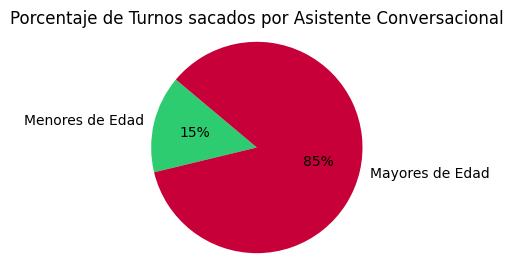

In [ ]:
# Representamoss graficamente los porcentajes de los turnos obtenidos por el AC
porcentajes = [porcentaje_menores_edad, porcentaje_mayores_edad]
categorias = ['Menores de Edad', 'Mayores de Edad']
colores = ['#2ECC71', '#C70039']

plt.figure(figsize=(3, 3))
plt.pie(porcentajes, labels=categorias, colors=colores, autopct='%1.0f%%', startangle=140)
plt.title('Porcentaje de Turnos sacados por Asistente Conversacional')
plt.axis('equal')
plt.show()

Identificamos que el 85% de los pacientes que obtienen un turno por el AC son mayores de edad , y un 15% menores de edad. Nuestra hipotesis es que si " Es menor de edad, (FALTA COMPLETAR)

## **Ahora contestaremos las 3 preguntas: **

¿Hay hospitales que le dé la sensación de que son más grandes y otros más pequeños? ¿Por qué?
¿Hay especialidades que presentan mayor tasa de asistencia que otras? ¿A qué puede deberse?
¿Hay especialistas que presenten menor tasa de asistencia que otras?

## ¿Hay hospitales que le dé la sensación de que son más grandes y otros más pequeños? ¿Por qué?

**En base a lo analizado en el punto 1, observamos algunos datos que nos ayudar a contestar estas preguntas**


***Según la cantidad de turnos:***

Por lo que observamos, el Centro Winterfell, Hospital Dragonstone y el Instituto Harrenhal son los que amyor cantidad de turnos tienen a lo largo del dataset con más de 10.000 turnos.  

***Según la cantidad de sedes:***

Existe una diferencia muy grande con la cantidad de sedes, el Instituto Harrenhal tiene 10 sedes marcando una gran diferencia vs el siguiente que es el Centro Winterfell con solo 3 sedes.

***Según la cantidad de Especialidades:***

Con respecto a las especialidades, observamos que el Centro Winterfell es el hospital más especializado con 49 disciplinas, seguido por el Instituto Harrenhal con 34.

En conclusión, el hospitales que parece más grande es Centro Winterfell y el Instituto Harrenhal y apenas por debajo de este el Hospital Dragonstone.

## ¿Hay especialidades que presentan mayor tasa de asistencia que otras? ¿A qué puede deberse?

ACA HAY ALGUNOS RATE CON NAN Y OTROS RATE CON DOS VALORES PARA UNA MISMA ESPECIALIDAD Y HOSPITAL

In [ ]:
df_esp_base=df_exp_base.copy()[['hos_id','msp_name','msp_asistance_rate','attendance']]
df_esp_base.head(2)

,hos_id,msp_name,msp_asistance_rate,attendance
0,Hospital Dragonstone,NEUROLOGA,71.085359,0
1,Instituto Harrenhal,CARDIOLOGIA INFANTIL,75.919732,0


In [ ]:
top_esp_asist=df_esp_base.copy()
top_esp_asist=top_esp_asist.sort_values('msp_asistance_rate',ascending=False)
top_esp_asist=top_esp_asist[top_esp_asist['msp_asistance_rate']>=80]
top_esp_asist=top_esp_asist.groupby(['hos_id','msp_name','msp_asistance_rate'],as_index=False)['attendance'].count()
top_esp_asist
# print(top_esp_asist.count()[0])
# top_esp_asist.head(2)

,hos_id,msp_name,msp_asistance_rate,attendance
0,Centro Winterfell,CARDIOLOGIA,83.565681,1028
1,Centro Winterfell,CIRUGA GINECOLGICA,83.248731,16
2,Centro Winterfell,CIRUGA TORAX,88.549618,22
3,Centro Winterfell,CIRUGIA,89.459640,237
4,Centro Winterfell,CIRUGIA CARDIOVASCULAR,82.938389,9
...,...,...,...,...
59,Instituto Harrenhal,PEDIATRIA,86.871985,1593
60,Instituto Harrenhal,REUMATOLOGIA,81.452859,12
61,Instituto Harrenhal,TRAUMATOLOGIA,83.829276,1733
62,Instituto Harrenhal,TRAUMATOLOGIA Y ORTOPEDIA,84.120083,341


In [ ]:
hospitales = sort_list_hosp#top_esp_asist['hos_id'].unique()

for hos_id in hospitales:
    df_hospital = top_esp_asist[top_esp_asist['hos_id'] == hos_id]

    cantidad_especialidades = df_hospital['hos_id'].count()

    # Imprimir el resultado
    print(f'Cantidad de especialidades con una tasa de asistencia mayor al 80%: {cantidad_especialidades}')

    # Ordenar el DataFrame por msp_asistance_rate de mayor a menor
    df_hospital = df_hospital.sort_values(by='msp_asistance_rate', ascending=False)

    fig = px.bar(
        df_hospital,
        x='msp_name',
        y='msp_asistance_rate',
        title=f'{hos_id}: Tasa de Asistencia por Especialidad',
        labels={'msp_name': 'Especialidad', 'msp_asistance_rate': 'Tasa de Asistencia (%)'},
        text='msp_asistance_rate'  # Mostrar el porcentaje en las etiquetas de las barras
    )

    # Actualizar el layout para mostrar los valores como texto en las barras con 2 decimales
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

    fig.show()

Cantidad de especialidades con una tasa de asistencia mayor al 80%: 22


Cantidad de especialidades con una tasa de asistencia mayor al 80%: 1


Cantidad de especialidades con una tasa de asistencia mayor al 80%: 15


Cantidad de especialidades con una tasa de asistencia mayor al 80%: 16


Cantidad de especialidades con una tasa de asistencia mayor al 80%: 0


Cantidad de especialidades con una tasa de asistencia mayor al 80%: 10


In [ ]:
# check=df_esp_base.copy()
# check=check[check['hos_id']=='Hospital Dragonstone']
# check=check[check['msp_asistance_rate']>=80]
# check['msp_name'].unique()

## **¿Hay especialistas que presenten menor tasa de asistencia que otras?**

In [ ]:
df_doc_base=df_exp_base.copy()[['hos_id','doc_id','msp_name','doc_asistance_rate','attendance']]
df_doc_base.head(2)

,hos_id,doc_id,msp_name,doc_asistance_rate,attendance
0,Hospital Dragonstone,215,NEUROLOGA,72.831978,0
1,Instituto Harrenhal,1855,CARDIOLOGIA INFANTIL,71.698113,0


In [ ]:
tail_med_asist=df_doc_base.copy()
tail_med_asist=tail_med_asist.sort_values('doc_asistance_rate',ascending=False)

max_doc_rate=tail_med_asist['doc_asistance_rate'].max()

# print(f'Cantidad de especialidades con una tasa de asistencia mayor al 80%: {max_doc_rate}')

print(f'Máxima tasa de asistencia: {max_doc_rate}')
tail_med_asist=tail_med_asist[tail_med_asist['doc_asistance_rate']<50]
tail_med_asist=tail_med_asist.groupby(['hos_id','doc_id','doc_asistance_rate'],as_index=False)['attendance'].count()
tail_med_asist.sort_values('doc_asistance_rate').drop('attendance',axis=1).head(5)

Máxima tasa de asistencia: 100.0


,hos_id,doc_id,doc_asistance_rate
6,Consultorios Poniente,937,0.000000
23,Consultorios Poniente,1005,0.000000
34,Hospital Dragonstone,90,0.000000
16,Consultorios Poniente,970,0.000000
2,Centro médico Casterly Rock,7,4.109589


In [ ]:
tail_med_asist_grouped=tail_med_asist.copy().groupby(['hos_id'])['doc_id'].count()
tail_med_asist_grouped.reset_index().sort_values('doc_id',ascending=False)

,hos_id,doc_id
2,Consultorios Poniente,29
0,Centro Winterfell,2
3,Dorne,2
4,Hospital Dragonstone,2
1,Centro médico Casterly Rock,1


# **Ejercicio 3**: Generación-Construcción en el dataset

- Calcule la cantidad de turnos sacados, consultados y cancelados por mes, por hospital y sede. Realice un gráfico con los resultados de estas cantidades. Interprete los resultados intentando esbozar hipótesis en el uso del asistente conversacional así como propios de cada hospital y contexto. Dado que los nombres de los hospitales están anonimizados y han sido reemplazados por lugares ficticios de "juego de tronos" le invitamos a qué, si así lo desea, pueda utilizar su creatividad para hipotetizar el por qué tales comportamientos.



### **En este punto entendemos que turnos sacados y cancelados, se refieren a asistidos y no asistidos por mes, ya que las cols de 'qt_sac_pac_ac' (ex 'action_A_count') y "qt_canc_pac_ac" (ex "action_B_count") son históricas y no mensuales**

In [ ]:
turnos_hosp_base=df_exp_base.copy()[['hos_id',	'heq_id','qt_cons_pac','attendance',"periodo"]]
turnos_hosp_base.head(5)

,hos_id,heq_id,qt_cons_pac,attendance,periodo
0,Hospital Dragonstone,3,4,0,2023-06
1,Instituto Harrenhal,12,0,0,2023-07
2,Hospital Dragonstone,3,2,0,2023-10
3,Centro médico Casterly Rock,5,0,1,2023-08
4,Hospital Dragonstone,3,0,1,2023-07


In [ ]:
turnos_hosp_sac=turnos_hosp_base.copy()
turnos_hosp_sac=turnos_hosp_sac[turnos_hosp_sac['attendance']==1]
turnos_hosp_sac=turnos_hosp_sac.groupby(['periodo','hos_id','heq_id'],as_index=False)['attendance'].count()
turnos_hosp_sac#.head(2)

,periodo,hos_id,heq_id,attendance
0,2023-04,Hospital Dragonstone,3,3
1,2023-05,Centro Winterfell,2,1
2,2023-05,Centro médico Casterly Rock,5,3
3,2023-05,Dorne,3,2
4,2023-05,Hospital Dragonstone,3,10
...,...,...,...,...
87,2023-11,Instituto Harrenhal,11,236
88,2023-11,Instituto Harrenhal,12,114
89,2023-11,Instituto Harrenhal,14,38
90,2023-11,Instituto Harrenhal,15,26


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

hos_ids = sort_list_hosp#turnos_hosp_sac['hos_id'].unique()

# Crear subplots
fig = make_subplots(rows=len(hos_ids), cols=1, subplot_titles=[f' {hos_id}' for hos_id in hos_ids])

# Agregar una línea para cada combinación de hos_id y heq_id
for i, hos_id in enumerate(hos_ids):
    df_hos = turnos_hosp_sac[turnos_hosp_sac['hos_id'] == hos_id]
    for heq_id in df_hos['heq_id'].unique():
        df_heq = df_hos[df_hos['heq_id'] == heq_id]
        fig.add_trace(
            go.Scatter(x=df_heq['periodo'], y=df_heq['attendance'], mode='lines+markers+text', text=df_heq['attendance'], textposition='top center'),
            row=i + 1, col=1
        )

# Actualizar el layout
fig.update_layout(height=400 * len(hos_ids), title_text="Asistencia por Hospital y Sedes por Periodo ")
fig.update_xaxes(title_text='Periodo')
fig.update_yaxes(title_text='Cantidad de Asistencias')

fig.show()

In [ ]:
turnos_poniente=turnos_hosp_sac.copy()
turnos_poniente=turnos_poniente[turnos_poniente['hos_id']=='Consultorios Poniente']
turnos_poniente

,periodo,hos_id,heq_id,attendance
80,2023-11,Consultorios Poniente,1,1


### **Ahora vamos con las Inasistencias (Cancelados)**

In [ ]:
turnos_hosp_canc=turnos_hosp_base.copy()
turnos_hosp_canc=turnos_hosp_canc[turnos_hosp_canc['attendance']==0]
turnos_hosp_canc=turnos_hosp_canc.groupby(['periodo','hos_id','heq_id'],as_index=False)['attendance'].count()
turnos_hosp_canc#.head(2)

,periodo,hos_id,heq_id,attendance
0,2023-04,Hospital Dragonstone,3,3
1,2023-05,Hospital Dragonstone,3,1
2,2023-06,Centro Winterfell,2,128
3,2023-06,Centro Winterfell,4,21
4,2023-06,Centro médico Casterly Rock,2,38
...,...,...,...,...
90,2023-11,Instituto Harrenhal,11,67
91,2023-11,Instituto Harrenhal,12,36
92,2023-11,Instituto Harrenhal,14,16
93,2023-11,Instituto Harrenhal,15,10


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

hos_ids = sort_list_hosp#turnos_hosp_canc['hos_id'].unique()

# Crear subplots
fig = make_subplots(rows=len(hos_ids), cols=1, subplot_titles=[f' {hos_id}' for hos_id in hos_ids])

# Agregar una línea para cada combinación de hos_id y heq_id
for i, hos_id in enumerate(hos_ids):
    df_hos = turnos_hosp_canc[turnos_hosp_canc['hos_id'] == hos_id]
    for heq_id in df_hos['heq_id'].unique():
        df_heq = df_hos[df_hos['heq_id'] == heq_id]
        fig.add_trace(
            go.Scatter(x=df_heq['periodo'], y=df_heq['attendance'], mode='lines+markers+text', text=df_heq['attendance'], textposition='top center'),
            row=i + 1, col=1
        )

# Actualizar el layout
fig.update_layout(height=400 * len(hos_ids), title_text="Inasistencia por Hospital y Sedes por Periodo ")
fig.update_xaxes(title_text='Periodo')
fig.update_yaxes(title_text='Cantidad de Inasistencia')

fig.show()

### **CONSULTAS POR MES:**

In [ ]:
#consultas
cons_mes=turnos_hosp_base.copy()
cons_mes=cons_mes.groupby(['periodo','hos_id','heq_id'],as_index=False)['qt_cons_pac'].sum()
cons_mes

,periodo,hos_id,heq_id,qt_cons_pac
0,2023-04,Hospital Dragonstone,3,47
1,2023-05,Centro Winterfell,2,0
2,2023-05,Centro médico Casterly Rock,5,13
3,2023-05,Dorne,3,0
4,2023-05,Hospital Dragonstone,3,18
...,...,...,...,...
94,2023-11,Instituto Harrenhal,11,526
95,2023-11,Instituto Harrenhal,12,128
96,2023-11,Instituto Harrenhal,14,126
97,2023-11,Instituto Harrenhal,15,46


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

hos_ids = sort_list_hosp.copy()#turnos_hosp_canc['hos_id'].unique()

# Crear subplots
fig = make_subplots(rows=len(hos_ids), cols=1, subplot_titles=[f' {hos_id}' for hos_id in hos_ids])

# Agregar una línea para cada combinación de hos_id y heq_id
for i, hos_id in enumerate(hos_ids):
    df_hos = cons_mes[cons_mes['hos_id'] == hos_id]
    for heq_id in df_hos['heq_id'].unique():
        df_heq = df_hos[df_hos['heq_id'] == heq_id]
        fig.add_trace(
            go.Scatter(x=df_heq['periodo'], y=df_heq['qt_cons_pac'], mode='lines+markers+text', text=df_heq['qt_cons_pac'], textposition='top center'),
            row=i + 1, col=1
        )

# Actualizar el layout
fig.update_layout(height=400 * len(hos_ids), title_text="Cantidad de consultas por Hospital y Sedes por Periodo ")
fig.update_xaxes(title_text='Periodo')
fig.update_yaxes(title_text='Cantidad de Consultas')

fig.show()

- Calcular la cantidad de turnos sacados, consultados y cancelados por mes, por especialidad en el *Centro Winterfell*. Realice un gráfico con los resultados de estas cantidades. Interprete los resultados intentando esbozar hipótesis en el uso del asistente conversacional así como propios del hospital y contexto.

In [ ]:

# Consideramos que cada fila del data frame es un turno sacado
# Filtrar solo los datos relevantes para el cálculo
relevant_columns = ['msp_name','hos_id','heq_id','qt_cons_pac','qt_canc_pac_ac','attendance',"periodo",'app_start_dt']
filtered_df = df_exp_base[relevant_columns].copy()
datos_wint = filtered_df[filtered_df['hos_id'] == 'Centro Winterfell']



#filtered_df.head(10)
datos_wint.head(10)



,msp_name,hos_id,heq_id,qt_cons_pac,qt_canc_pac_ac,attendance,periodo,app_start_dt
5,CARDIOLOGIA,Centro Winterfell,2,0,0,1,2023-11,2023-11-22 15:30:00
8,GINECOLOGIA Y OBSTETRICIA,Centro Winterfell,2,1,13,1,2023-11,2023-11-08 17:15:00
9,TRAUMATOLOGIA,Centro Winterfell,2,0,0,1,2023-07,2023-07-19 12:00:00
12,CARDIOLOGIA,Centro Winterfell,2,3,4,1,2023-07,2023-07-05 16:00:00
19,CLINICA MEDICA,Centro Winterfell,3,2,4,1,2023-11,2023-11-09 18:00:00
21,OFTALMOLOGA,Centro Winterfell,2,0,0,0,2023-11,2023-11-09 16:30:00
26,ENDOCRINOLOGIA,Centro Winterfell,4,0,0,1,2023-10,2023-10-31 10:45:00
27,DIABETOLOGA,Centro Winterfell,2,2,2,0,2023-11,2023-11-02 10:15:00
28,GINECOLOGIA,Centro Winterfell,2,0,0,0,2023-10,2023-10-27 16:45:00
40,GINECOLOGIA Y OBSTETRICIA,Centro Winterfell,2,1,1,1,2023-11,2023-11-16 18:30:00


In [ ]:
datos_wint.shape

(13751, 8)

In [ ]:
datos_wint['msp_name'].unique()

array(['CARDIOLOGIA', 'GINECOLOGIA Y OBSTETRICIA', 'TRAUMATOLOGIA',
       'CLINICA MEDICA', 'OFTALMOLOGA', 'ENDOCRINOLOGIA', 'DIABETOLOGA',
       'GINECOLOGIA', 'UROLOGIA', 'MASTOLOGIA', 'CIRUGIA PLASTICA',
       'DERMATOLOGIA', 'REUMATOLOGIA', 'CIRUGIA', 'PEDIATRIA',
       'TRAUMATOLOGIA INFANTIL', 'GASTROENTEROLOGIA', 'NUTRICION',
       'DERMATOLOGIA PEDIATRICA', 'INFECTOLOGA', 'NEUMONOLOGIA',
       'NEUROCIRUGIA', 'ALERGIA', 'NEUROLOGIA', 'OTORRINOLARINGOLOGIA',
       'OBSTETRICIA', 'CIRUGA GINECOLGICA', 'CONTROL ANUAL MUJER',
       'FLEBOLOGIA', 'OFTALMOLOGIA', 'ONCOLOGIA', 'NEFROLOGIA',
       'OFTALMOLOGIA PEDIATRICA', 'NEUMONOLOGIA PEDIATRICA',
       'CIRUGIA DE CABEZA Y CUELLO', 'HEPATOLOGA', 'HEMATOLOGIA',
       'NEUROLOGA PEDIATRICA', 'OSTEOPATA', 'CIRUGA TORAX',
       'OTOEMISIONES ACUSTICAS OEA', 'CARDIOLOGIA PEDIATRICA',
       'PSIQUIATRIA', 'NUTRICIN INFANTIL', 'CIRUGA BARIATRICA',
       'CIRUGIA CARDIOVASCULAR', 'MEDICINA DEL DEPORTE', 'PLANTILLAS',
       '

Cuento la cantidad de turnos sacados por especialidad y por mes que hay en el Centro Winterfel

In [ ]:

wint_turn_sac_esp=datos_wint.copy().groupby(['msp_name','periodo'],as_index=False)['app_start_dt'].count()
wint_turn_sac_esp.sort_values('app_start_dt',ascending=False)


,msp_name,periodo,app_start_dt
86,GINECOLOGIA,2023-11,861
195,TRAUMATOLOGIA,2023-11,819
52,CLINICA MEDICA,2023-11,658
83,GINECOLOGIA,2023-07,613
9,CARDIOLOGIA,2023-11,456
...,...,...,...
127,NEUMONOLOGIA PEDIATRICA,2023-08,1
79,GASTROENTEROLOGIA,2023-09,1
103,INFECTOLOGA,2023-08,1
106,MASTOLOGIA,2023-05,1


In [ ]:
wint_turn_sac_esp.shape

(203, 3)

In [ ]:
wint_turn_sac_esp['app_start_dt'].sum()

13751

In [ ]:
# Visualizamos la cantidad de turnos sacados por especialidad a lo largo de los periodos del dataset


# Ordenamos 'msp_name' alfabéticamente
msp_order = sorted(wint_turn_sac_esp['msp_name'].unique())

# Crear el gráfico de barras con Plotly Express
fig = px.bar(wint_turn_sac_esp, x='periodo', y='app_start_dt', color='msp_name',
             labels={'periodo': 'Mes', 'app_start_dt': 'Cantidad de Turnos', 'msp_name': 'ID de la especialidad'},
             title='Turnos por mes por especialidad',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             category_orders={'msp_name': msp_order})  # Ordenar 'msp_name' alfabéticamente


fig.update_traces(texttemplate='%{y}', textposition='outside')

# Configurar la visibilidad de los trazos
for i, msp_name in enumerate(fig.data):
    if i < 1:  # Mostrar solo las tres primeras leyendas
        fig.data[i].visible = True
    else:
        fig.data[i].visible = 'legendonly'


fig.show()

Cantidad de turnos que fueron consultados por especialidad en el Centro Winterfel.

In [ ]:
wint_turn_sac_esp=datos_wint.copy().groupby(['periodo','msp_name'],as_index=False)['qt_cons_pac'].count()
wint_turn_sac_esp.sort_values('qt_cons_pac',ascending=False)

,periodo,msp_name,qt_cons_pac
173,2023-11,GINECOLOGIA,861
200,2023-11,TRAUMATOLOGIA,819
165,2023-11,CLINICA MEDICA,658
51,2023-07,GINECOLOGIA,613
156,2023-11,CARDIOLOGIA,456
...,...,...,...
94,2023-08,INFECTOLOGA,1
98,2023-08,NEUMONOLOGIA PEDIATRICA,1
5,2023-06,CIRUGA GINECOLGICA,1
115,2023-10,CIRUGA GINECOLGICA,1


Visualizamos la cantidad de turnos consultados por especialidad a lo largo de los periodos del dataset

In [ ]:
# Ordenamos 'msp_name' alfabéticamente
msp_order = sorted(wint_turn_sac_esp['msp_name'].unique())

# Crear el gráfico de barras con Plotly Express
fig = px.bar(wint_turn_sac_esp, x='periodo', y='qt_cons_pac', color='msp_name',
             labels={'periodo': 'Mes', 'qt_cons_pac': 'Cantidad de Turnos', 'msp_name': 'ID de la especialidad'},
             title='Consultas por mes por especialidad en Winterfel',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             category_orders={'msp_name': msp_order})  # Ordenar 'msp_name' alfabéticamente


fig.update_traces(texttemplate='%{y}', textposition='outside')

# Configurar la visibilidad de los trazos
for i, msp_name in enumerate(fig.data):
    if i < 1:  # Mostrar solo las tres primeras leyendas
        fig.data[i].visible = True
    else:
        fig.data[i].visible = 'legendonly'


fig.show()

Cantidad de turnos que fueron cancelados por especialidad en el Centro Winterfel.

In [ ]:
wint_turn_sac_esp=datos_wint.copy().groupby(['msp_name','periodo'],as_index=False)['qt_canc_pac_ac'].count()
wint_turn_sac_esp.sort_values('qt_canc_pac_ac',ascending=False)

,msp_name,periodo,qt_canc_pac_ac
86,GINECOLOGIA,2023-11,861
195,TRAUMATOLOGIA,2023-11,819
52,CLINICA MEDICA,2023-11,658
83,GINECOLOGIA,2023-07,613
9,CARDIOLOGIA,2023-11,456
...,...,...,...
127,NEUMONOLOGIA PEDIATRICA,2023-08,1
79,GASTROENTEROLOGIA,2023-09,1
103,INFECTOLOGA,2023-08,1
106,MASTOLOGIA,2023-05,1


Visualizamos la cantidad de turnos cancelados por especialidad a lo largo de los periodos del dataset

In [ ]:
# Ordenamos 'msp_name' alfabéticamente
msp_order = sorted(wint_turn_sac_esp['msp_name'].unique())

# Crear el gráfico de barras con Plotly Express
fig = px.bar(wint_turn_sac_esp, x='periodo', y='qt_canc_pac_ac', color='msp_name',
             labels={'periodo': 'Mes', 'qt_canc_pac_ac': 'Cantidad de Turnos', 'msp_name': 'ID de la especialidad'},
             title='Turnos cancelados por mes por especialidad en Winterfel',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             category_orders={'msp_name': msp_order})  # Ordenar 'msp_name' alfabéticamente


fig.update_traces(texttemplate='%{y}', textposition='outside')

# Configurar la visibilidad de los trazos
for i, msp_name in enumerate(fig.data):
    if i < 1:  # Mostrar solo las tres primeras leyendas
        fig.data[i].visible = True
    else:
        fig.data[i].visible = 'legendonly'


fig.show()

# **Ejercicio 4**: Investigación
Planteénse como grupo al menos una pregunta de investigación concreta que crean que el dataset dado puede responder, ¿Qué creen que podrían predecir con el dataset presentado?¿se les ocurre más de una idea? Es importante responder estas preguntas y desarrollarlas además de identificar la variable target para cada caso.


In [ ]:
turnos_alergia=df_exp_base.copy()[['msp_name','hos_id','age_avg','doc_asistance_rate','patient_id','attendance',"periodo"]]
turnos_alergia=turnos_alergia[turnos_alergia['msp_name'].isin(['ALERGIA','alergia'])]
turnos_alergia

,msp_name,hos_id,age_avg,doc_asistance_rate,patient_id,attendance,periodo
188,ALERGIA,Instituto Harrenhal,7.0,77.544426,234620,1,2023-10
221,ALERGIA,Centro Winterfell,44.0,73.905429,329034,0,2023-10
252,ALERGIA,Dorne,2024.0,72.000000,694301,1,2023-07
403,ALERGIA,Dorne,44.0,72.000000,382787,0,2023-08
418,ALERGIA,Centro Winterfell,17.0,73.905429,706527,1,2023-11
...,...,...,...,...,...,...,...
46705,ALERGIA,Hospital Dragonstone,77.0,67.404130,49372,1,2023-06
46784,ALERGIA,Centro Winterfell,7.0,73.905429,672087,1,2023-10
46803,ALERGIA,Hospital Dragonstone,34.0,67.404130,80688,1,2023-10
46962,ALERGIA,Hospital Dragonstone,54.0,67.404130,53459,1,2023-08


In [ ]:
turnos_agrupados_periodo = turnos_alergia.groupby(['hos_id', 'periodo'])['attendance'].count().reset_index()
turnos_agrupados_periodo.head(5)

,hos_id,periodo,attendance
0,Centro Winterfell,2023-06,5
1,Centro Winterfell,2023-07,58
2,Centro Winterfell,2023-08,16
3,Centro Winterfell,2023-10,67
4,Centro Winterfell,2023-11,122


In [ ]:
# Lista de hospitales (supongo que sort_list_hosp es una lista de hos_id)
hospitales = sort_list_hosp  # top_esp_asist['hos_id'].unique() si deseas obtener los hospitales únicos

for hos_id in hospitales:
    df_hospital = turnos_agrupados_periodo[turnos_agrupados_periodo['hos_id'] == hos_id]

    fig = px.bar(
        df_hospital,
        x='periodo',
        y='attendance',
        title=f'{hos_id}: Cantidad de Turnos por Periodo',
        labels={'periodo': 'Periodo', 'attendance': 'Cantidad de Turnos'},
        text='attendance'  # Mostrar la cantidad en las etiquetas de las barras
    )

    # Actualizar el layout para mostrar los valores como texto en las barras con 2 decimales
    fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

    fig.show()

In [ ]:
turnos_agrupados_edad = turnos_alergia.groupby(['hos_id', 'age_avg'])['attendance'].count().reset_index()
turnos_agrupados_edad=turnos_agrupados_edad[turnos_agrupados_edad['age_avg']<=94]
turnos_agrupados_edad.head(5)

,hos_id,age_avg,attendance
0,Centro Winterfell,7.0,32
1,Centro Winterfell,17.0,36
2,Centro Winterfell,21.0,19
3,Centro Winterfell,24.0,21
4,Centro Winterfell,30.0,44


In [ ]:
# Lista de hospitales (supongo que sort_list_hosp es una lista de hos_id)
hospitales = sort_list_hosp  # top_esp_asist['hos_id'].unique() si deseas obtener los hospitales únicos

for hos_id in hospitales:
    df_hospital = turnos_agrupados_edad[turnos_agrupados_edad['hos_id'] == hos_id]

    fig = px.bar(
        df_hospital,
        x='age_avg',
        y='attendance',
        title=f'{hos_id}: Cantidad de Turnos por Periodo',
        labels={'age_avg': 'edad', 'attendance': 'Cantidad de Turnos'},
        text='attendance'  # Mostrar la cantidad en las etiquetas de las barras
    )

    # Actualizar el layout para mostrar los valores como texto en las barras con 2 decimales
    fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

    fig.show()